<font color = green >

## Home Task: Implement K-means algorithm

</font>


In [283]:
import numpy as np
import matplotlib.pyplot as plt

<font color = green >

###  Data 

</font>



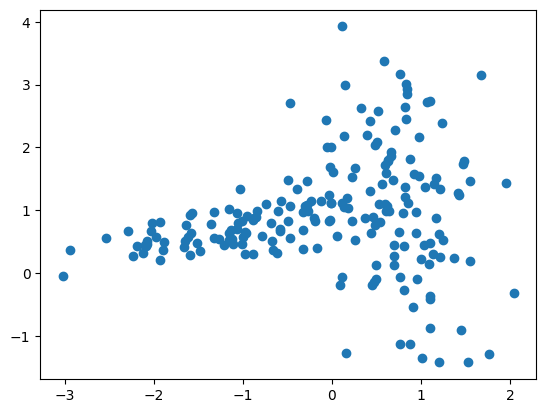

In [284]:
from sklearn.datasets import make_classification

X, _= make_classification(n_samples=200,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            random_state=0,
                            n_clusters_per_class=1,
                            class_sep = 0.8)
plt.figure()
plt.scatter  (X[:,0], X[:,1])

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

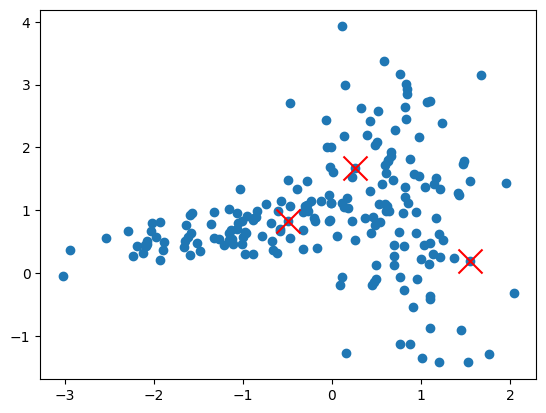

In [285]:
# 1. Initialize K centroids

def initialize_centroids(k: int, X: np.ndarray, *, random_seed: int=None):
    # X.shape = (m, n)
    # C.shape = (k, n)

    np.random.seed(seed=random_seed)
    C = X[np.random.choice(X.shape[0], k)]
    return C

C = initialize_centroids(3, X, random_seed=42)

def plot_centroids(C, X):
    plt.figure()
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(C[:,0], C[:,1], marker='x', s=300, c='red')

plot_centroids(C, X)

In [286]:
# 2. Assign every point to closest centroid
from sklearn.metrics.pairwise import euclidean_distances

def assign_centroids(C, X):
    # C.shape = (k, n)
    # X.shape = (m, n)
    # Diff.shape = (m, k)
    # Assign.shape = (m,)

    D = euclidean_distances(X, C)
    A = D.argmin(axis=1)
    return A

A = assign_centroids(C, X)
A

array([0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       1, 0], dtype=int64)

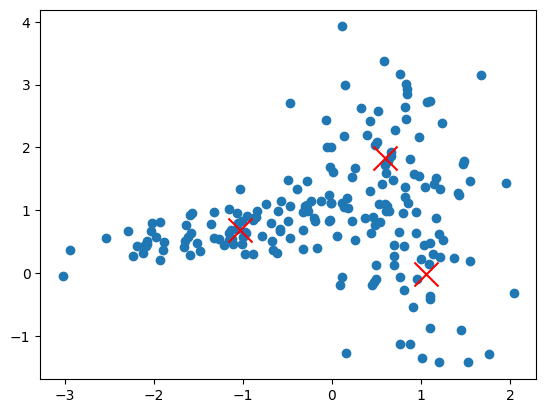

In [287]:
# 3. Compute new centroids as means of samples assigned to corresponding centroid

def compute_centroids(X, A):
    # X.shape = (m, n)
    # A.shape = (m,)
    # C.shape = (k, n)

    k = np.unique(A).shape[0]
    C = np.empty((k, X.shape[1]))
    for c in range(k):
        C[c] = X[A == c].mean(axis=0)

    return C

new_C = compute_centroids(X, A)
plot_centroids(new_C, X)


In [291]:
# 4. Implement cost J = np.mean(D**2) is distance from sample X to assigned centroid C

def compute_cost(X, C, A):
    # X.shape = (m, n)
    # C.shape = (k, n)
    # A.shape = (m,)
    # D.shape = (m,)

    centers = C[A]
    D = np.linalg.norm(X - centers, axis=1)
    J = np.mean(D**2)
    return J

J = compute_cost(X, C, A)
print(J)

new_A = assign_centroids(new_C, X)

new_J = compute_cost(X, new_C, new_A)
new_J

0.9545204023640256


0.6560929456005242

In [301]:
# 5. Iterate setps 2,3 till cost is stabile 

def kmeans(X, k, *, random_seed=None, max_iter=100, tol=1e-5):
    C = initialize_centroids(k, X, random_seed=random_seed)
    A = assign_centroids(C, X)
    J_prev = compute_cost(X, C, A)
    for _ in range(max_iter):
        C = compute_centroids(X, A)
        A = assign_centroids(C, X)
        J = compute_cost(X, C, A)
        if np.abs(J - J_prev) < tol:
            break
        J_prev = J
    return C, A, J

C, A, J = kmeans(X, 3, random_seed=42)


Final cost J = 0.6418923429534198


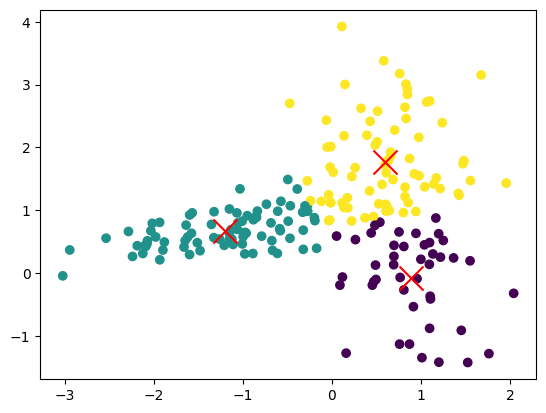

In [302]:
def visualize_clustering(X, A, C):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=A)
    plt.scatter(C[:,0], C[:,1], marker='x', s=300, c='red')

print('Final cost J =', J)
visualize_clustering(X, A, C)

In [311]:
# 6. Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

def kmeans_best(X, k, *, n_init=100, random_seed=None, max_iter=100, tol=1e-5):
    best_J = np.inf
    iter_seeds = np.random.randint(n_init*100, size=n_init)
    for i in range(n_init):
        np.random.seed(seed=random_seed)
        C, A, J = kmeans(X, k, random_seed=iter_seeds[i], max_iter=max_iter, tol=tol)
        if J < best_J:
            best_C, best_A, best_J = C, A, J
    return best_C, best_A, best_J

C, A, J = kmeans_best(X, 3, random_seed=42)

Final cost J = 0.6416951814622367


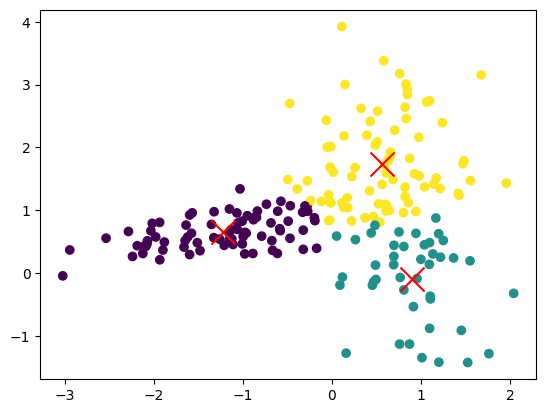

In [313]:
print('Final cost J =', J)
visualize_clustering(X, A, C)

Final cost for 4 clusters J = 0.4576916248652856


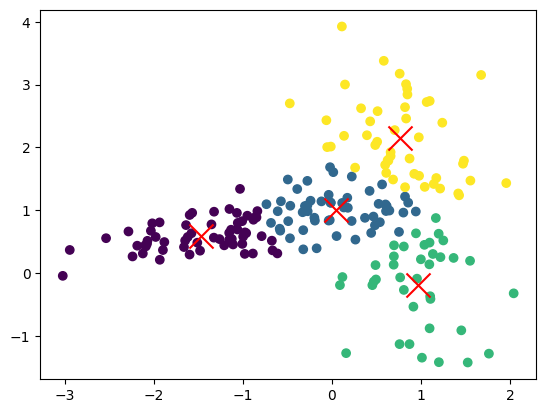

In [314]:
# 7. Visualize results (clusters, centroids) for K=4

C, A, J = kmeans_best(X, 4, random_seed=42)

print('Final cost for 4 clusters J =', J)
visualize_clustering(X, A, C)
